In [480]:
%matplotlib inline
import numpy as np
import pandas as pd
import re as re
import sklearn
import seaborn as sns
import matplotlib as plt
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import os.path

import csv

df = pd.read_csv(os.path.join(os.getcwd(),'data/train.tsv'), delim_whitespace=True)
#print (df.info())
df
df = df.set_index('Time')
df["Leap_angle"] = df["Leap_angle"].shift(-3)


In [481]:
data = pd.read_table(os.path.join(os.getcwd(),'data/distance.tsv'))
X = data[["Volt"]].values 
y = data["Dist"].values 
regr = LinearRegression()
regr = regr.fit(X, y)
y_fit = regr.predict(X)
print(regr.coef_)
print(regr.intercept_)
min = data["Dist"][0]
max = data["Dist"][1]

[-0.20676692]
67.4060150376


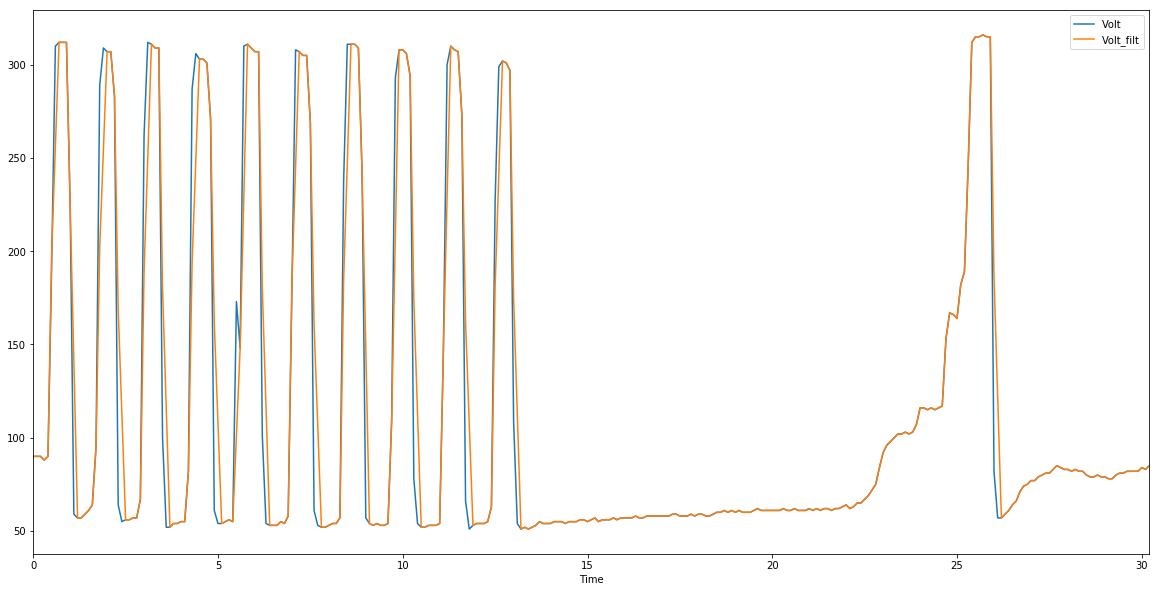

In [482]:
lis = df["Volt"].values.copy()
for index, item in enumerate(lis):
    if index < len(lis)-2:
        if abs(lis[index] - lis[index+2]) < 5:
            if abs(lis[index] - lis[index+1]) > 10:
                lis[index+1] = (lis[index] + lis[index+2])/2
        elif abs(lis[index] - lis[index+1]) > 100:
            lis[index+1] = (lis[index] + lis[index+2])/2
df["Volt_filt"] = lis
df[["Volt","Volt_filt"]].plot(figsize=(20,10))

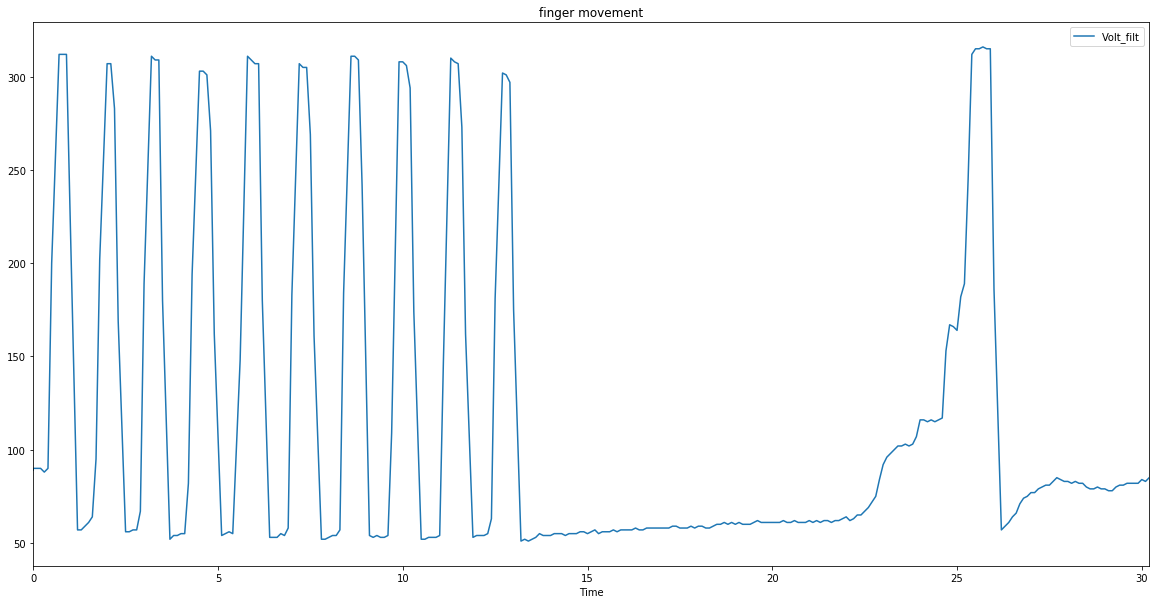

In [483]:
volt = df["Volt_filt"]
df["Dist"] =volt * regr.coef_ + regr.intercept_
df.plot(y="Volt_filt",figsize=(20,10),title='finger movement')

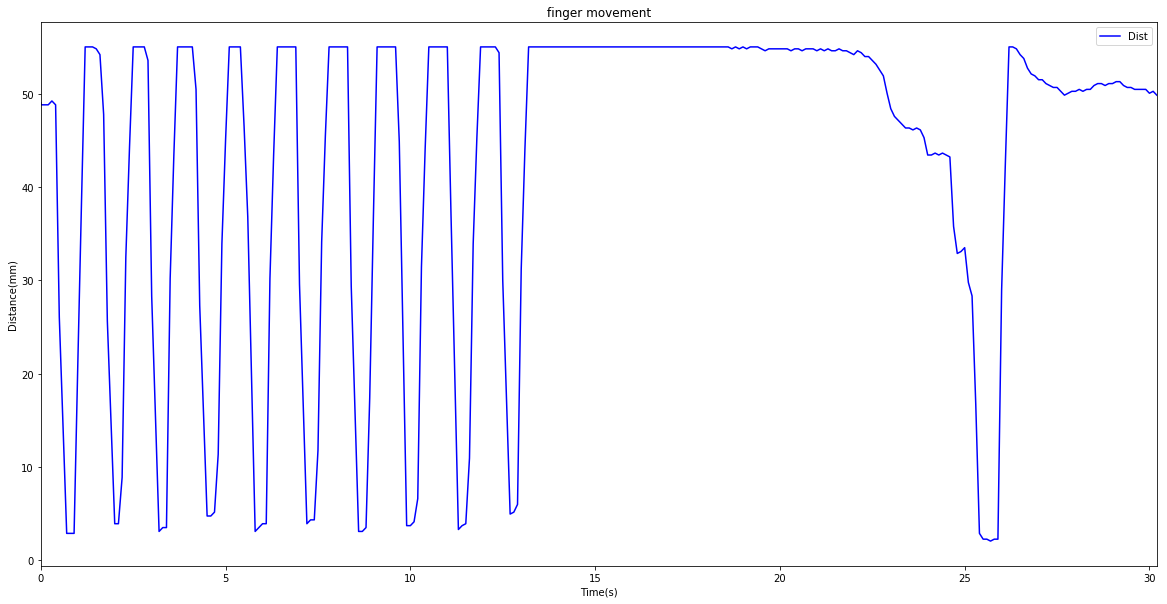

In [484]:
df["Dist"] = df["Dist"].apply(lambda x : min if x < min else (max if x > max else x))
df.plot(y="Dist",figsize=(20,10),title='finger movement',color="b")
plt.xlabel("Time(s)")
plt.ylabel("Distance(mm)")

In [485]:
df["Diff"] = df["Dist"].diff()
df["Fabs"]= np.fabs(df["Diff"])
df["Fabs_filter"] = df["Fabs"].apply(lambda x : 0 if x < 1 else  x)
df["Sum"] = df["Fabs_filter"].cumsum()

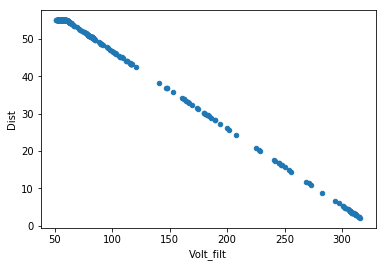

In [486]:
df.plot.scatter(x='Volt_filt',y='Dist')

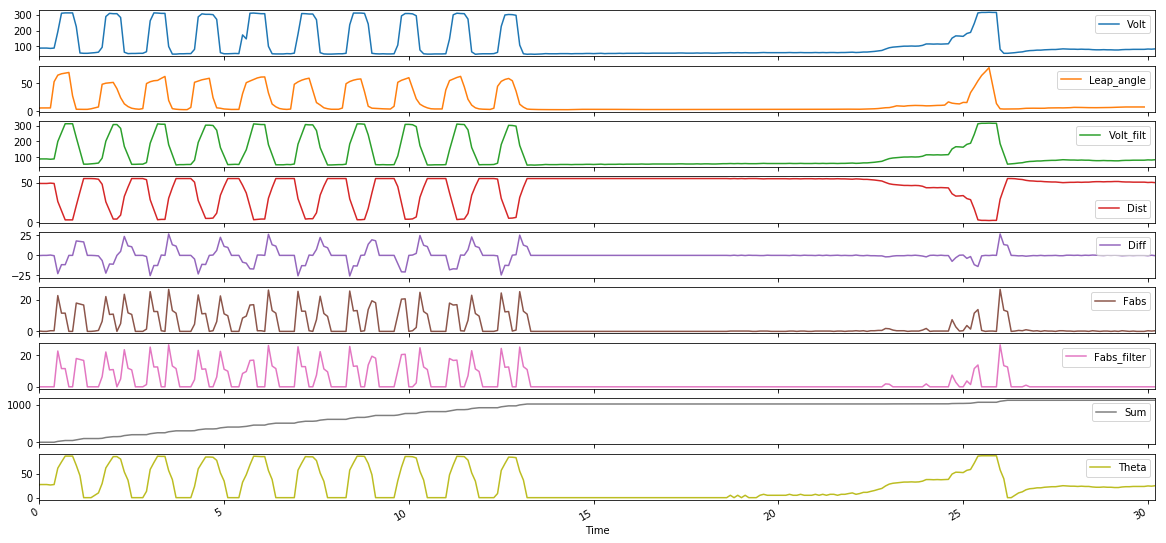

In [487]:
import math
df["Theta"] = df["Dist"].apply(lambda x : math.degrees(math.acos(x/max)))
df.plot(figsize=(20,10),subplots=True);

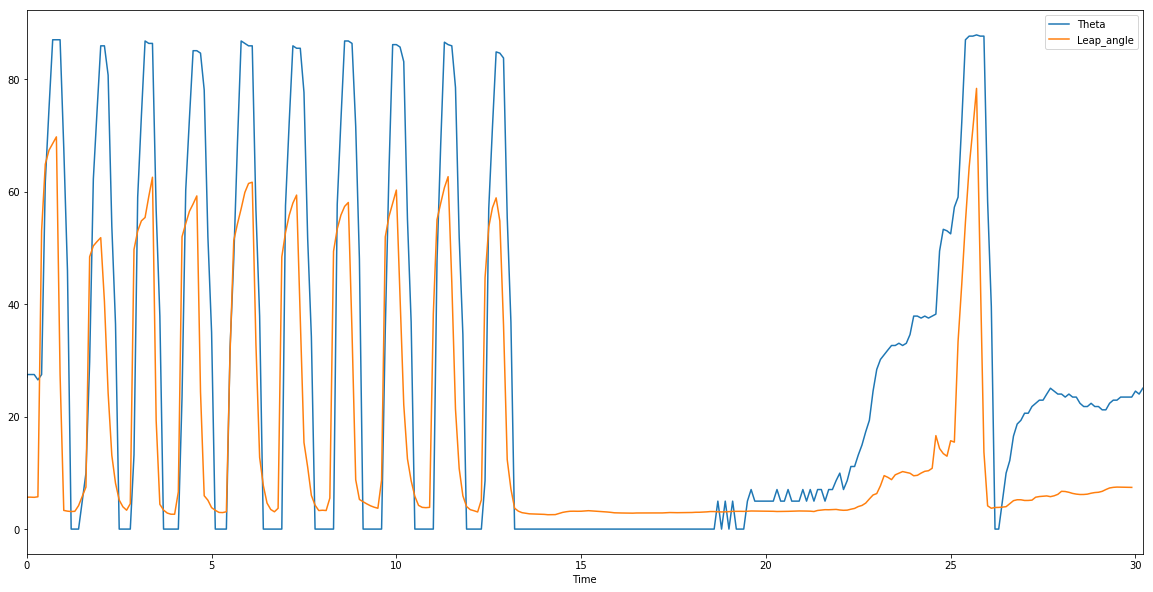

In [488]:
df[["Theta","Leap_angle"]].plot(figsize=(20,10))

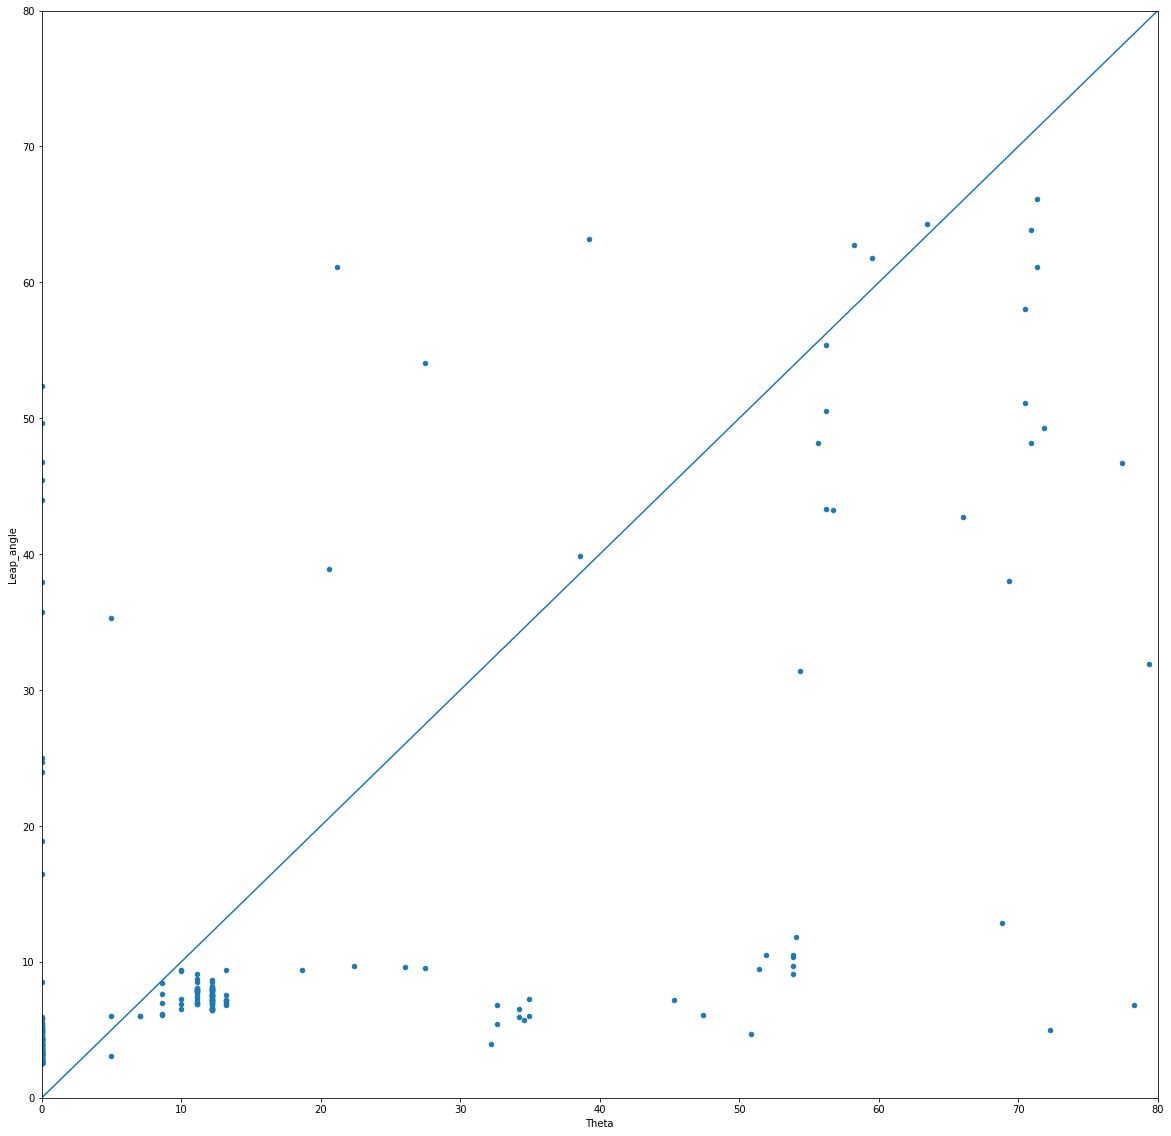

In [478]:
df.plot.scatter(x="Theta",y="Leap_angle",figsize=(20,20),xlim=(0,80),ylim=(0,80))
x = np.arange(100)
y=x
plt.plot(x,y)



In [479]:
from sklearn.metrics import mean_absolute_error
dff = df.dropna()
y_pred = (pd.Series(dff["Theta"]))
y = (pd.Series(dff["Leap_angle"]))
print(mean_absolute_error(y, y_pred))


12.8010696467
